In [21]:
%matplotlib inline

import numpy as np 
from matplotlib import pyplot as plt

from netCDF4 import Dataset as nc


import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime
from datetime import timedelta

#on prend une date de référence
dateref = datetime.strptime("1950-01-01","%Y-%m-%d")

In [2]:
path_file = '/home/audreyhyeans/Bureau/Master1POC/Scientific_Programming/cartopy_and_read_files/dt_global_allsat_phy_l4_20161114_20170530.nc'

#say that this doc is a netcdf4 format
netcdf = nc(path_file, mode='r')

print(netcdf.dimensions.keys())
print(netcdf.variables.keys())

dict_keys(['time', 'latitude', 'longitude', 'nv'])
dict_keys(['crs', 'time', 'latitude', 'lat_bnds', 'longitude', 'lon_bnds', 'nv', 'sla', 'err', 'ugos', 'vgos', 'ugosa', 'vgosa', 'adt'])


In [3]:
lon = netcdf['longitude'][:]
lat = netcdf['latitude'][:]
sla = netcdf['sla'][:]
zonal_u = netcdf['ugos'][:]
zonal_v = netcdf['vgos'][:]

In [4]:
print(np.shape(lon))
print(np.shape(lat))

(1440,)
(720,)


In [5]:
Lon,Lat = np.meshgrid(lon, lat)

In [6]:
lon_sub = lon[(42<lon)&(lon<50)]
lat_sub = lat[(22<lat)&(lat<30)]

In [7]:
Lon_sub, Lat_sub = np.meshgrid(lon_sub,lat_sub)

In [8]:
#print(np.shape(sla))
sla_sub = sla[0][(lat>-30)&(lat<-22),:][:,(lon>42)&(lon<50)]
zonal_u_sub = zonal_u[0][(lat>-30)&(lat<-22),:][:,(lon>42)&(lon<50)]
zonal_v_sub = zonal_v[0][(lat>-30)&(lat<-22),:][:,(lon>42)&(lon<50)]
#print(np.shape(zonal_u))
#print(sla_sub)

<ipython-input-22-5bafdde835f4>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c1 = ax1.pcolormesh(lon,lat,sla[0])
<ipython-input-22-5bafdde835f4>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c2 = ax2.pcolormesh(lon_sub, lat_sub, sla_sub)


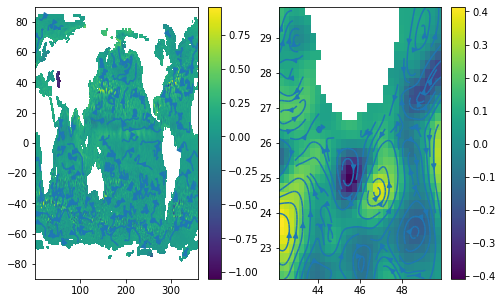

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,5))
c1 = ax1.pcolormesh(lon,lat,sla[0])
plt.colorbar(c1,ax=ax1)
ax1.streamplot(lon,lat,zonal_u[0],zonal_v[0])
c2 = ax2.pcolormesh(lon_sub, lat_sub, sla_sub)
plt.colorbar(c2,ax=ax2)
ax2.streamplot(lon_sub,lat_sub,zonal_u_sub,zonal_v_sub)
#ax.quiver(Lon_sub[::step],... avc step=1)

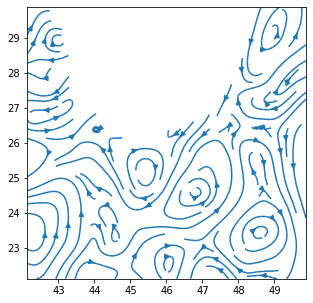

In [10]:
plt.figure(figsize = (5,5))
plt.streamplot(lon_sub,lat_sub,zonal_u_sub, zonal_v_sub)

## question2

In [16]:
file = '/home/audreyhyeans/Bureau/Master1POC/Scientific_Programming/first_steps_python/madrtsg_compatible_medfilt(1).nc'

In [17]:
ncf = nc(file, mode='r')
#netcdf = nc(file,mode='r')
print(ncf.dimensions.keys())
print(ncf.variables.keys())

dict_keys(['DAYD', 'DAYD_EXT', 'NCOEF_CAL', 'NCOEF_LIN', 'STRING256', 'STRING14', 'STRING8', 'STRING4', 'N1'])
dict_keys(['REFERENCE_DATE_TIME', 'DATE', 'DATE_EXT', 'DAYD', 'DAYD_EXT', 'LATX', 'LATX_EXT', 'LONX', 'LONX_EXT', 'POSITION_QC', 'SPDC', 'PRES', 'FLU2', 'FLOW', 'CNDC', 'CNDC_STD', 'CNDC_CAL', 'CNDC_FREQ', 'CNDC_CALCOEF', 'CNDC_CALCOEF_CONV', 'CNDC_LINCOEF', 'CNDC_LINCOEF_CONV', 'SSJT', 'SSJT_QC', 'SSJT_STD', 'SSJT_CAL', 'SSJT_FREQ', 'SSJT_CALCOEF', 'SSJT_CALCOEF_CONV', 'SSJT_LINCOEF', 'SSJT_LINCOEF_CONV', 'SSJT_ADJUSTED', 'SSJT_ADJUSTED_ERROR', 'SSJT_ADJUSTED_QC', 'SSJT_ADJUSTED_HIST', 'SSPS', 'SSPS_QC', 'SSPS_STD', 'SSPS_CAL', 'SSPS_ADJUSTED', 'SSPS_ADJUSTED_ERROR', 'SSPS_ADJUSTED_QC', 'SSPS_ADJUSTED_HIST', 'SSPS_DEPH', 'SSPS_DEPH_MIN', 'SSPS_DEPH_MAX', 'SSTP', 'SSTP_QC', 'SSTP_CAL', 'SSTP_FREQ', 'SSTP_ADJUSTED', 'SSTP_ADJUSTED_ERROR', 'SSTP_ADJUSTED_QC', 'SSTP_ADJUSTED_HIST', 'SSTP_DEPH', 'SSTP_DEPH_MIN', 'SSTP_DEPH_MAX', 'SSTP_CALCOEF', 'SSTP_CALCOEF_CONV', 'SSTP_LINCOEF',

In [18]:
#LONX = ncf['longitude'][:]
day = ncf['DAYD'][:]
SSTP = ncf['SSTP'][:]